In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [51]:
df = pd.read_excel("1832_v4.xlsx", index_col=0)
jobs = pd.read_excel("histoire urbaine digitale classification metiers.xlsx", na_values="?")

In [53]:
df.head()

,nom_rue,nom_rue_htr_corr,nom_rue_norm,nom_rue_norm_2,no_maison,proprietaire_nom,proprietaire_nom_corr,proprietaire_nom_htr_corr,proprietaire_nom_norm,proprietaire_nom_norm_2,...,pensionnaires_origine_corr,pensionnaires_origine_htr_corr,pensionnaires_origine_norm,pensionnaires_condition,pensionnaires_condition_top_terms,pensionnaires_condition_htr_corr,pensionnaires_condition_norm,pensionnaires_recepisse,observations,Page
1,martheray,martheray,marterey,marterey,1,veidmann,veidmann,veidmann,weidmann,weidmann,...,tolochenaz|frutigen|cirol|bavarois,tolochenaz|frutigen|cirol|bavarois,tolochenaz|frutigen|cirol|bavarois,petite fille naturelle|dom|macon|ouvrier charron,petite fille naturelle|domestique|macon|ouvrie...,petite fille naturelle|dom|macon|ouvrier charron,petite fille naturelle|domestique|maracon|ouvr...,12879|10913|16222,de barhara taidman nee,1
2,martheray,martheray,marterey,marterey,2,collioud,collioud,collioud,collioud,collioud,...,montherod|rolle,montherod|rolle,montherod|rolle,ouvrier|ouv,ouvrier|ouvrier,ouvrier|ouv,ouvrier|ouvrier,·,·,1
3,martheray,martheray,marterey,marterey,3,fiaux,fiaux,fiaux,fiaux,fiaux,...,·,·,·,·,·,·,·,·,·,1
4,martheray,martheray,marterey,marterey,·,·,·,·,·,fiaux,...,thoune|mex|orny,thoune|mex|orny,thoune|mex|orny,domesti|domesti|domesti,domestique|domestique|domestique,domesti|domesti|domesti,domesti|domesti|domesti,·,·,1
5,martheray,martheray,marterey,marterey,·,·,·,·,·,fiaux,...,·,·,·,·,·,·,·,·,·,1


In [52]:
jobs.head()

,JOB,CLASS
0,rentiere,rente
1,journalier,agricole
2,vigneron,agricole
3,rentier,rente
4,proprietaire,rente


In [40]:
df["chef_vocation"]

1                charon
2              marechat
3               lingere
4               rentier
5       garcon viturier
             ...       
3697               atif
3698        journallier
3699        agriculteur
3700        agriculteur
3701           fruisier
Name: chef_vocation, Length: 3674, dtype: object

In [41]:
# Join df and jobs with chef_vocation in df and JOB in jobs
df = df.join(jobs.set_index("JOB"), on="chef_vocation", how="left")
# rename the CLASS column as chef_vocation_class
df = df.rename(columns={"CLASS": "chef_vocation_class"})

In [47]:
jobs.JOB

0           rentiere
1         journalier
2           vigneron
3            rentier
4       proprietaire
           ...      
84          cafetier
85             niege
86           gantier
87    vendeur de vin
88           pecheur
Name: JOB, Length: 89, dtype: object

In [45]:
for job in df.chef_vocation.unique():
    print(job)

charon
marechat
lingere
rentier
garcon viturier
avocat
abenitte|no de
garde arsenal
marchand
cordonnier
tonnelier
·
journalier
vigneron
charpent
manoeuvre
tesserand
tessiveuse
professeur
manoeuvre|lessioeuse
journaliere
cabarelies
menuisier
truiteur
charpentier
jobernalt
rid
charretier
charpens
journel
lithographe
patfrenier
couvreur
charponteur
inspice|thospie|fermier ju
ghangolai
charpet
crorpent
marechal
jardinier
charron
charpents
salprenier
insette|lamaison|lamaison|de ferre
menetrey
titteraud
journalier|som marieu
champ de vain
vigneron|ane aissae
annee de naissance|garde police
tailleuse
marichal
macon
domestique
agriculteur
etseuse
patrenier
perronnier
voiturier
vigneron|pintre
de la
compond de la|institutrices
rentiere
cloutier
chapelier
nais|couturiere
gardinier
serrurier
fondanuriert
garde malade
femme de
tisserand
domest|son mardin firm
au che de i
sage femme
tailleur
tailleur de pierre
som marie mplz|mom mari empli
modiste
repasseuse
tanneur
boulanger
vocturier
murt
marche

In [49]:
df[["chef_vocation", "chef_vocation_class"]]

,chef_vocation,chef_vocation_class
1,charon,NaN
2,marechat,NaN
3,lingere,service
4,rentier,rente
5,garcon viturier,NaN
...,...,...
3697,atif,NaN
3698,journallier,NaN
3699,agriculteur,agricole
3700,agriculteur,agricole


In [3]:
df.columns

Index(['nom_rue', 'no_maison', 'proprietaire_nom', 'chef_prenom', 'chef_nom',
       'chef_annee_naissance', 'epouse_nom', 'epouse_annee_naissance',
       'enfants_dans_la_commune_prenom', 'enfants_annee_naissance',
       'chef_origine', 'chef_annee_arrivee', 'chef_vocation', 'chef_recepisse',
       'pensionnaires_prenom', 'pensionnaires_nom', 'pensionnaires_origine',
       'pensionnaires_condition', 'pensionnaires_recepisse', 'observations',
       'Page'],
      dtype='object')

In [4]:
df.shape

(3674, 21)

In [5]:
df.chef_origine.shape

(3674,)

In [6]:
df.groupby("chef_origine").size()

chef_origine
abbaye               4
abbaye de fouy       1
abbaye|lausanne      1
abram|montreux       1
abugemiont           1
                  ... 
zuriens              1
·                  260
·|aubonne            1
·|fux                1
·|lyon               1
Length: 1503, dtype: int64

In [7]:
df_new = df[df.chef_annee_naissance.str.len() == 4]
df_new = df_new[df_new.chef_annee_naissance.str.isnumeric()]
df_new.chef_annee_naissance = df_new.chef_annee_naissance.astype(int)

In [8]:
df_new.shape[0] / df.shape[0]

0.7942297223734349

In [9]:
df_new.describe()

,chef_annee_naissance,Page
count,2918.000000,2918.000000
mean,1787.913297,75.406100
std,126.981946,41.513812
min,1264.000000,1.000000
25%,1776.000000,42.000000
50%,1787.000000,77.000000
75%,1798.000000,109.000000
max,7771.000000,151.000000


Remove all people that are negative or less than $0$ years old and people that are more than $100$ years old.

In [10]:
df_new = df_new[(df_new.chef_annee_naissance < 1832) & (df_new.chef_annee_naissance >= 1732)]
print(f"Ratio of values that we keep {df_new.shape[0] / df.shape[0]:%}, number of values that we keep is {df_new.shape[0]}.")

Ratio of values that we keep 78.307022%, number of values that we keep is 2877.


In [11]:
df_new

,nom_rue,no_maison,proprietaire_nom,chef_prenom,chef_nom,chef_annee_naissance,epouse_nom,epouse_annee_naissance,enfants_dans_la_commune_prenom,enfants_annee_naissance,...,chef_annee_arrivee,chef_vocation,chef_recepisse,pensionnaires_prenom,pensionnaires_nom,pensionnaires_origine,pensionnaires_condition,pensionnaires_recepisse,observations,Page
1,martheray,1,veidmann,george,de naisse|veidmann,1764,·,·,·,·,...,1786,charon,844,louise|anna|francois|jn adam,veidmann|la maurer|kirsner|reverber,tolochenaz|frutigen|cirol|bavarois,petite fille naturelle|dom|macon|ouvrier charron,12879|10913|16222,de barhara taidman nee,1
3,martheray,3,fiaux,louise,piot,1785,neissance,·,benjamin,1815,...,nee,lingere,2272,·,·,·,·,·,·,1
5,martheray,·,·,louis vincent,lavanchy,1802,baud,1805,·,·,...,ne,garcon viturier,4462,·,·,·,·,·,·,1
7,martheray,·,·,dominique,dubois,1797,·,·,·,·,...,1828,abenitte|no de,1490,adolphine cecile|adolphine,borrely|borrely,paris|enfant de la che,lingere|dite nee en o,489,·,1
8,martheray,·,·,francois,piaux,1787,blaud,·,felix|charles|ernestine,1826|·|1822,...,ne,rentier,·,rose marie,metraux,pailly,domest,3370,·,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,no de leurs,·,·,jn abram,martin,1804,francoise,1804,henry|david,1829|1830,...,·,atif,·,·,·,·,·,·,·,150
3698,montherond,·,jacob martin,jean abram,blanc,1806,marie,1807,charles elie|louis jules,1829|1831,...,1830,journallier,·,·,·,·,·,·,·,151
3699,sangalles,·,commune de t|lausanne,veuve,culler,1810,·,neene,jn louise|lse susanne|jean marc|jaques|ct fran...,1800|1803|1806|1808|1809|1812|1814,...,1820,agriculteur,922,·,·,·,·,·,·,151
3700,chalet aux cenfans,·,md aubergiste,david,abeiden,1771,francoise,1773,·,·,...,·,agriculteur,612,·,·,·,·,·,·,151


In [12]:
df_new.describe()

,chef_annee_naissance,Page
count,2877.000000,2877.000000
mean,1785.818561,75.569343
std,14.055069,41.524744
min,1741.000000,1.000000
25%,1776.000000,42.000000
50%,1787.000000,77.000000
75%,1797.000000,109.000000
max,1824.000000,151.000000


In [13]:
df_new[df_new.chef_annee_naissance == 1824]

,nom_rue,no_maison,proprietaire_nom,chef_prenom,chef_nom,chef_annee_naissance,epouse_nom,epouse_annee_naissance,enfants_dans_la_commune_prenom,enfants_annee_naissance,...,chef_annee_arrivee,chef_vocation,chef_recepisse,pensionnaires_prenom,pensionnaires_nom,pensionnaires_origine,pensionnaires_condition,pensionnaires_recepisse,observations,Page
563,saux,·,·,jean david,martin,1824,coulin,1804,francois|emanuel,1828|1830,...,·,tanneur,3185,louise,maillari,perey,pensionnaire,4850,·,22


Find the proprietary that comes up the most frequently.

In [14]:
df_new.groupby("proprietaire_nom").size().sort_values(ascending=False)

proprietaire_nom
·            1748
blanc          27
iio            13
rouge          12
chapuis        12
             ... 
fischer         1
forneret        1
fraisse         1
franallon       1
·|nos           1
Length: 735, dtype: int64

Number of children:

In [15]:
def count_children(s: str) -> int:
    if s == '·' or s == '.':
        return 0
    return s.count("|") + 1

df_new["nb_enfants"] = df_new.enfants_dans_la_commune_prenom.apply(count_children)

In [16]:
df_new.describe()

,chef_annee_naissance,Page,nb_enfants
count,2877.000000,2877.000000,2877.000000
mean,1785.818561,75.569343,1.534932
std,14.055069,41.524744,1.698168
min,1741.000000,1.000000,0.000000
25%,1776.000000,42.000000,0.000000
50%,1787.000000,77.000000,1.000000
75%,1797.000000,109.000000,2.000000
max,1824.000000,151.000000,10.000000


<AxesSubplot:title={'center':'Distribution des années de naissance du chef'}, xlabel='chef_annee_naissance', ylabel='Count'>

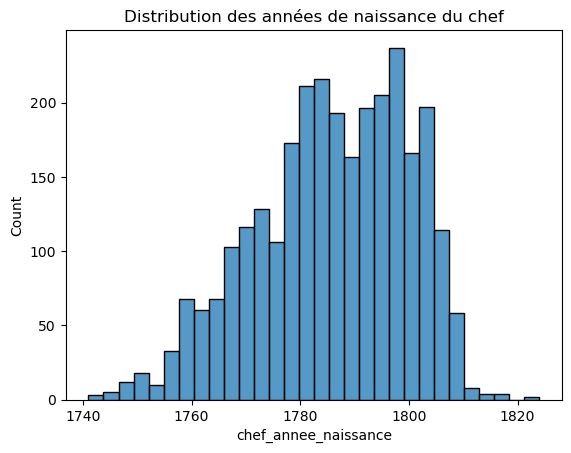

In [25]:
plt.title("Distribution des années de naissance du chef")
sns.histplot(data=df_new, x="chef_annee_naissance", bins=30)

<AxesSubplot:title={'center':"Distribution du nombre d'enfants"}, xlabel='nb_enfants', ylabel='Count'>

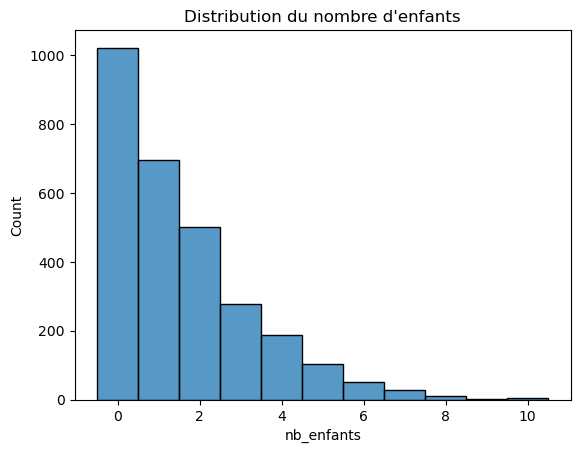

In [18]:
plt.title("Distribution du nombre d'enfants")
sns.histplot(data=df_new, x="nb_enfants", discrete=True)

In [37]:
import statsmodels.api as sm
import scipy

In [68]:
sm.qqplot(df_new.nb_enfants, line='45', dist=scipy.stats.poisson.stats, distargs=5)

TypeError: 'int' object is not iterable